In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
X=df.drop(columns=['PassengerId','Name','Cabin','Survived','Ticket'])
Y=df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


In [260]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [261]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

In [262]:
pre = ColumnTransformer([("num",num_pipe,con),
                         ("cat",cat_pipe,cat)]).set_output(transform="pandas")

In [263]:
X.pre=pre.fit_transform(X)
X.pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [264]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(
    X.pre,Y,test_size=0.2,random_state=21
)

In [265]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,0.000000,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.130754,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.515526,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.208115,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.023154,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [266]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [267]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.284663,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.823344,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.746389,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,0.000000,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.484880,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [268]:
xtest.shape

(179, 10)

In [269]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


## Model Building

In [270]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="entropy"
)
model1.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [271]:
model1.score(xtrain,ytrain)

0.6474719101123596

## Hyper parameters tuning Random Forest

In [272]:
params = {
    "n_estimators" : [10,50,100,200,300],
    "max_depth" : [2,3,4,5],
    "min_samples_split" : [5,6,7,8,9,10]
}

Using Randomize Search CV

In [273]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rscv_rf = RandomizedSearchCV(rf,param_distributions=params,cv=5,scoring="f1_macro")
rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [274]:
rscv_rf.best_params_

{'n_estimators': 200, 'min_samples_split': 6, 'max_depth': 5}

In [275]:
rscv_rf.best_score_

np.float64(0.8017897596851092)

In [276]:
best_rf=rscv_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=200)

## Model Evaluation Random Forest

In [277]:
best_rf.score(xtrain,ytrain)

0.8567415730337079

In [278]:
best_rf.score(xtest,ytest)

0.8324022346368715

In [279]:
ypred_train=best_rf.predict(xtrain)
ypred_test=best_rf.predict(xtest)

In [280]:
ypred_train[0:5]

array([0, 0, 0, 1, 0])

In [281]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [282]:
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [283]:
 ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


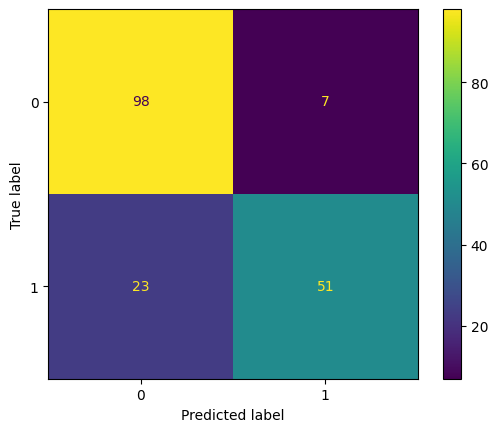

In [284]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf,xtest,ytest)

In [285]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       105
           1       0.88      0.69      0.77        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



### Grading Boosting

In [286]:
from sklearn.ensemble import GradientBoostingClassifier
model2=GradientBoostingClassifier(
learning_rate=0.001,
n_estimators=1,
max_depth=1,
min_samples_leaf=5,
min_samples_split=5
)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [287]:
model2.score(xtrain,ytrain)

0.6235955056179775

In [288]:
model2.score(xtest,ytest)

0.5865921787709497

## Hyper parameter tunig of gradient bostng

In [289]:
params2 ={
    "learning_rate" :[0.001,0.01,0.015,0.2],
    "n_estimators":[10,50,100,200,300],
    "max_depth" :[2,3,4,5]
}

In [290]:
gbc=GradientBoostingClassifier()
rscv_gb =RandomizedSearchCV(gbc,param_distributions=params2,cv=5,scoring ="f1_macro")
rscv_gb.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.015,
                                                          0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [291]:
rscv_gb.best_params_

{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}

In [292]:
rscv_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300)

In [293]:
rscv_gb.best_score_

np.float64(0.8037747300811564)

In [294]:
best_gb=rscv_gb.best_estimator_
best_gb

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300)

In [295]:
best_gb.score(xtrain, ytrain)

0.8525280898876404

In [296]:
best_gb.score(xtest,ytest)

0.8268156424581006

In [297]:
ypred_train2 =  best_gb.predict(xtrain)
ypred_test2 =best_gb.predict(xtest)

In [298]:
ypred_train2[0:5]

array([0, 0, 0, 1, 0])

In [299]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [300]:
ypred_test2[0:5]

array([0, 0, 0, 0, 0])

In [301]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


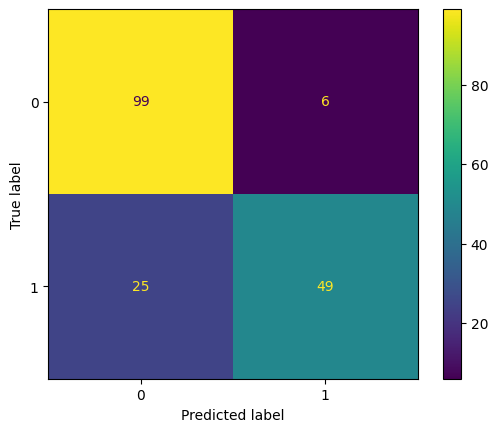

In [302]:
ConfusionMatrixDisplay.from_estimator(best_gb,xtest,ytest)

In [303]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       105
           1       0.89      0.66      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.83      0.82       179



### Feature Importance

In [304]:
best_gb.feature_importances_

array([0.14690466, 0.0972517 , 0.05014491, 0.00290359, 0.12058113,
       0.2867433 , 0.26220783, 0.00424947, 0.00122936, 0.02778403])

In [305]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [306]:
imp = pd.Series(best_gb.feature_importances_, index=xtrain.columns)
imp

num__Pclass        0.146905
num__Age           0.097252
num__SibSp         0.050145
num__Parch         0.002904
num__Fare          0.120581
cat__Sex_female    0.286743
cat__Sex_male      0.262208
cat__Embarked_C    0.004249
cat__Embarked_Q    0.001229
cat__Embarked_S    0.027784
dtype: float64

In [307]:
imp.sort_values(ascending=False)

cat__Sex_female    0.286743
cat__Sex_male      0.262208
num__Pclass        0.146905
num__Fare          0.120581
num__Age           0.097252
num__SibSp         0.050145
cat__Embarked_S    0.027784
cat__Embarked_C    0.004249
num__Parch         0.002904
cat__Embarked_Q    0.001229
dtype: float64

<Axes: >

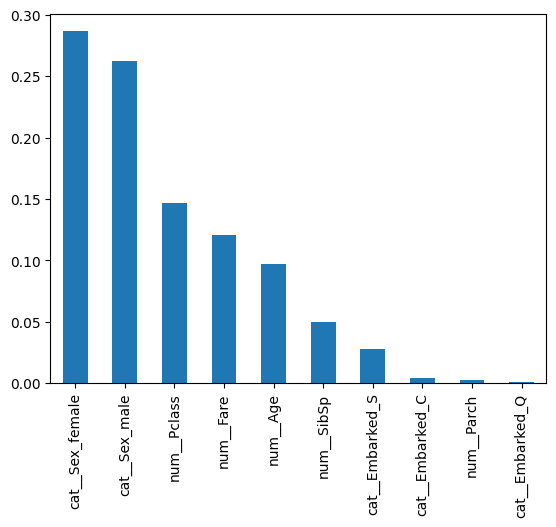

In [308]:
imp.sort_values(ascending=False).plot(kind='bar')

In [309]:
xnew = pd.read_csv('test.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [310]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [311]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.369449,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.331378,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.485693,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.207709,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.592481,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [312]:
preds = best_gb.predict(xnew_pre)
probs = best_gb.predict_proba(xnew_pre)

In [313]:
preds[0:5]

array([0, 0, 0, 0, 0])

In [314]:
probs[0:5]

array([[0.87352406, 0.12647594],
       [0.5558105 , 0.4441895 ],
       [0.87480978, 0.12519022],
       [0.87118189, 0.12881811],
       [0.56326394, 0.43673606]])

In [315]:
best_gb.classes_

array([0, 1])

In [316]:
prob_sur = probs[:, 1]
prob_sur[0:5]

array([0.12647594, 0.4441895 , 0.12519022, 0.12881811, 0.43673606])

In [317]:
# Saving Above data in Data Frame
df_final = xnew[['PassengerId']]
df_final['Survived_pred'] = preds
df_final['Prob'] = prob_sur
df_final

,PassengerId,Survived_pred,Prob
0,892,0,0.126476
1,893,0,0.444190
2,894,0,0.125190
3,895,0,0.128818
4,896,0,0.436736
...,...,...,...
413,1305,0,0.128818
414,1306,1,0.914227
415,1307,0,0.128818
416,1308,0,0.128818


In [318]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    294
1    124
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

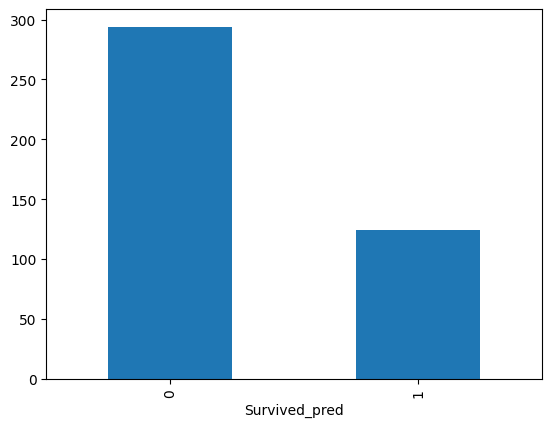

In [319]:
df_final["Survived_pred"].value_counts().plot(kind="bar")

In [320]:

df_final.to_csv('ensmble_train_test_Results.csv', index=False)